In [ ]:
import gdown
gdown.download(id='1nYC8lE8htkmeJ7GKT4iqoi5BZ2prefRW', output='PyQT5.zip')

Downloading...
From: https://drive.google.com/uc?id=1nYC8lE8htkmeJ7GKT4iqoi5BZ2prefRW
To: /content/PyQT5.zip
100%|██████████| 537k/537k [00:00<00:00, 27.5MB/s]


'PyQT5.zip'

In [ ]:
!unzip PyQT5.zip  -d /content/PyQT5

Archive:  PyQT5.zip
  inflating: /content/PyQT5/00_PyQt5_basic_01_QMainWindow.py  
  inflating: /content/PyQT5/00_PyQt5_basic_02_QIcon.py  
  inflating: /content/PyQT5/00_PyQt5_basic_03_Quit.py  
  inflating: /content/PyQT5/00_PyQt5_basic_04_setToolTip.py  
  inflating: /content/PyQT5/00_PyQt5_basic_05_statusBar.py  
  inflating: /content/PyQT5/00_PyQt5_basic_06_menuBar.py  
  inflating: /content/PyQT5/00_PyQt5_basic_07_toolBar.py  
  inflating: /content/PyQT5/00_PyQt5_basic_08_center_mainWindow.py  
  inflating: /content/PyQT5/00_PyQt5_basic_09_QDate.py  
  inflating: /content/PyQT5/00_PyQt5_basic_10_setStyleSheet.py  
  inflating: /content/PyQT5/00_PyQt5_setWindowTitle.py  
  inflating: /content/PyQT5/01_PyQt5_buttonclicked.py  
  inflating: /content/PyQT5/02_PyQt5_absolute_positioning.py  
  inflating: /content/PyQT5/02_PyQt5_QVBoxLayout_lebel_button.py  
  inflating: /content/PyQT5/03_PyQt5_QMainWindow_class.py  
  inflating: /content/PyQT5/04_PyQt5_QMainWindow_messageBox.py  
  in

#QT 동작과정

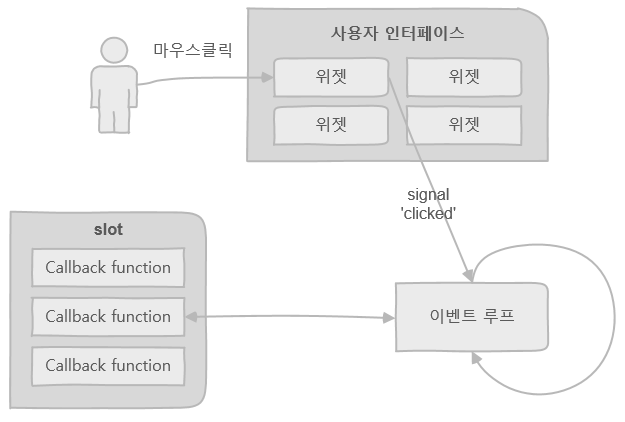

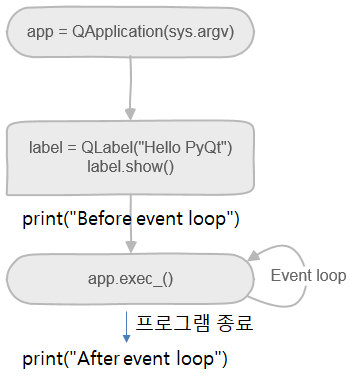

In [ ]:
!sudo apt-get install pyqt5-dev-tools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libevdev2 libgudev-1.0-0 libinput-bin libinput10 libmd4c0 libmtdev1
  libqt5core5a libqt5dbus5 libqt5designer5 libqt5gui5 libqt5help5
  libqt5network5 libqt5printsupport5 libqt5sql5 libqt5sql5-sqlite libqt5svg5
  libqt5test5 libqt5widgets5 libqt5xml5 libwacom-bin libwacom-common libwacom9
  libxcb-icccm4 libxcb-image0 libxcb-keysyms1 libxcb-render-util0 libxcb-util1
  libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1 libxkbcommon-x11-0 python3-pyqt5
  python3-pyqt5.sip qt5-gtk-platformtheme qttranslations5-l10n
Suggested packages:
  qt5-image-formats-plugins qtwayland5
The following NEW packages will be installed:
  libevdev2 libgudev-1.0-0 libinput-bin libinput10 libmd4c0 libmtdev1
  libqt5core5a libqt5dbus5 libqt5designer5 libqt5gui5 libqt5help5
  libqt5network5 libqt5printsupport5 libqt5sql5 libqt5sql5-sqlite libqt5svg5
  libqt5test5 libqt

In [ ]:
%cd PyQT5

/content/PyQT5


##slot_00  -  lcd and dial

- https://wikidocs.net/22021

In [ ]:
!python 14_PyQt5_slot_00.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 7-1. �����ϱ�.

import sys
from PyQt5.QtWidgets import QApplication, QWidget, QLCDNumber, QDial, QVBoxLayout

class MyApp(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        lcd = QLCDNumber(self)
        dial = QDial(self)

        vbox = QVBoxLayout()
        vbox.addWidget(lcd)
        vbox.addWidget(dial)
        self.setLayout(vbox)

        dial.valueChanged.connect(lcd.display)

        self.setWindowTitle('Signal and Slot')
        self.setGeometry(300, 300, 200, 200)
        self.show()


if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##이벤트 핸들러 만들기

- https://wikidocs.net/22023

In [ ]:
!python 14_PyQt5_slot_01.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
#https://wikidocs.net/22023
#Ex 7-2. �̺�Ʈ �ڵ鷯 �����.

import sys
from PyQt5.QtWidgets import (QApplication, QWidget
, QLCDNumber, QDial, QPushButton, QVBoxLayout, QHBoxLayout)

class MyApp(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        lcd = QLCDNumber(self)
        dial = QDial(self)
        btn1 = QPushButton('Big', self)
        btn2 = QPushButton('Small', self)

        hbox = QHBoxLayout()
        hbox.addWidget(btn1)
        hbox.addWidget(btn2)

        vbox = QVBoxLayout()
        vbox.addWidget(lcd)
        vbox.addWidget(dial)
        vbox.addLayout(hbox)
        self.setLayout(vbox)

        dial.valueChanged.connect(lcd.display)
        btn1.clicked.connect(self.resizeBig)
        btn2.clicked.connect(self.resizeSmall)

        self.setWindowTitle('Signal and Slot')
        self.setGeometry(200, 200, 200, 250)
        self.show()

    def resizeBig(self):
        self.resize(400, 500)

    def resizeSmall(self):
        self.resize(200, 250)

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##이벤트 핸들러 재구성하기

- https://wikidocs.net/22024

In [ ]:
!python 14_PyQt5_slot_02.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 7-3. �̺�Ʈ �ڵ鷯 �籸���ϱ�.
## https://wikidocs.net/23755
## ESC ����
## F �ִ�ȭ
## N �ּ�ȭ

import sys
from PyQt5.QtCore import Qt
from PyQt5.QtWidgets import QApplication, QWidget


class MyApp(QWidget):

    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setWindowTitle('Reimplementing event handler')
        self.setGeometry(300, 300, 300, 200)
        self.show()

    def keyPressEvent(self, e):
        if e.key() == Qt.Key_Escape:
            self.close()
        elif e.key() == Qt.Key_F:
            self.showFullScreen()
        elif e.key() == Qt.Key_N:
            self.showNormal()


if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##이벤트 핸들러 재구성하기2

- https://wikidocs.net/22024

In [ ]:
!python 14_PyQt5_slot_03.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 7-4. �̺�Ʈ �ڵ鷯 �籸���ϱ�2.
## https://wikidocs.net/22024
## ���콺 ��ġ ȭ�鿡 ǥ��

import sys
from PyQt5.QtWidgets import QApplication, QWidget, QLabel

class MyApp(QWidget):

    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        x = 0
        y = 0

        self.text = 'x: {0}, y: {1}'.format(x, y)
        self.label = QLabel(self.text, self)
        self.label.move(20, 20)

        self.setMouseTracking(True)

        self.setWindowTitle('Reimplementing event handler')
        self.setGeometry(300, 300, 300, 200)
        self.show()

    def mouseMoveEvent(self, e):
        x = e.x()
        y = e.y()

        text = 'x: {0}, y: {1}'.format(x, y)
        self.label.setText(text)
        self.label.adjustSize()


if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##사용자 정의 시그널

- https://wikidocs.net/22413

In [ ]:
!python 14_PyQt5_slot_04.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 7-5. ����� ���� �ñ׳�.
## https://wikidocs.net/22413

import sys
from PyQt5.QtCore import pyqtSignal, QObject
from PyQt5.QtWidgets import QApplication, QMainWindow

class Communicate(QObject):
    closeApp = pyqtSignal()


class MyApp(QMainWindow):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.c = Communicate()
        self.c.closeApp.connect(self.close)

        self.setWindowTitle('Emitting Signal')
        self.setGeometry(300, 300, 300, 200)
        self.show()

    def mousePressEvent(self, e):
        self.c.closeApp.emit()

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##점 그리기 (drawPoint)

- https://wikidocs.net/74076

In [ ]:
!python 15_PyQt5_painting_00.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 8-1-1. �� �׸���1 (drawPoint).
## https://wikidocs.net/74076

import sys
from PyQt5.QtWidgets import QWidget, QApplication
from PyQt5.QtGui import QPainter, QPen
from PyQt5.QtCore import Qt


class MyApp(QWidget):

    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setGeometry(300, 300, 400, 300)
        self.setWindowTitle('Points')
        self.show()

    def paintEvent(self, e):
        qp = QPainter()
        qp.begin(self)
        self.draw_point(qp)
        qp.end()

    def draw_point(self, qp):
        qp.setPen(QPen(Qt.blue,  8))
        qp.drawPoint(self.width()/2, self.height()/2)

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##직선 그리기 (drawLine)

- https://wikidocs.net/74077

In [ ]:
!python 15_PyQt5_painting_01.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 8-2. ���� �׸��� (drawLine).
## https://wikidocs.net/74077

import sys
from PyQt5.QtWidgets import QWidget, QApplication
from PyQt5.QtGui import QPainter, QPen
from PyQt5.QtCore import Qt

class MyApp(QWidget):

    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setGeometry(300, 300, 400, 300)
        self.setWindowTitle('drawLine')
        self.show()

    def paintEvent(self, e):
        qp = QPainter()
        qp.begin(self)
        self.draw_line(qp)
        qp.end()

    def draw_line(self, qp):
        qp.setPen(QPen(Qt.blue, 8))
        qp.drawLine(30, 230, 200, 50)
        qp.setPen(QPen(Qt.green, 12))
        qp.drawLine(140, 60, 320, 280)
        qp.setPen(QPen(Qt.red, 16))
        qp.drawLine(330, 250, 40, 190)

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##직사각형 그리기 (drawRect)

- https://wikidocs.net/74078

In [ ]:
!python 15_PyQt5_painting_02.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 8-3. ���簢�� �׸��� (drawRect).
## https://wikidocs.net/74078

import sys
from PyQt5.QtWidgets import QWidget, QApplication
from PyQt5.QtGui import QPainter, QPen, QColor, QBrush
from PyQt5.QtCore import Qt

class MyApp(QWidget):

    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setGeometry(300, 300, 400, 300)
        self.setWindowTitle('drawRect')
        self.show()

    def paintEvent(self, e):
        qp = QPainter()
        qp.begin(self)
        self.draw_rect(qp)
        qp.end()

    def draw_rect(self, qp):
        qp.setBrush(QColor(180, 100, 160))
        qp.setPen(QPen(QColor(60, 60, 60), 3))
        qp.drawRect(20, 20, 100, 100)

        qp.setBrush(QColor(40, 150, 20))
        qp.setPen(QPen(Qt.blue, 2))
        qp.drawRect(180, 120, 50, 120)

        qp.setBrush(Qt.yellow)
        qp.setPen(QPen(Qt.red, 5))
        qp.drawRect(280, 30, 80, 40)

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##둥근 직사각형 그리기 (drawRoundedRect)

- https://codetorial.net/pyqt5/paint/drawing_roundedrect.html

In [ ]:
!python 15_PyQt5_painting_03.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 8-4. �ձ� ���簢�� �׸��� (drawRoundedRect).
## https://codetorial.net/pyqt5/paint/drawing_roundedrect.html

import sys
from PyQt5.QtWidgets import QWidget, QApplication
from PyQt5.QtGui import QPainter, QPen, QColor, QBrush
from PyQt5.QtCore import Qt

class MyApp(QWidget):

    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setGeometry(300, 300, 400, 300)
        self.setWindowTitle('drawRoundedRect')
        self.show()

    def paintEvent(self, e):
        qp = QPainter()
        qp.begin(self)
        self.draw_roundedrect(qp)
        qp.end()

    def draw_roundedrect(self, qp):
        qp.setPen(QPen(Qt.black, 3))

        qp.drawRoundedRect(20, 20, 100, 100, 0, 0)
        qp.drawText(40, 140, 'radius: 0')

        qp.drawRoundedRect(150, 20, 100, 100, 10, 10)
        qp.drawText(170, 140, 'radius: 10')

        qp.drawRoundedRect(280, 20, 100, 100, 20, 20)
        qp.drawText(300, 140, 'radius: 20')

        qp.drawRoundedRect(20, 160, 100, 100, 30, 30)
        qp.drawText(40, 280, 'radius: 30')

        qp.drawRoundedRect(150, 160, 100, 100, 40, 40)
        qp.drawText(170, 280, 'radius: 40')

        qp.drawRoundedRect(280, 160, 100, 100, 50, 50)
        qp.drawText(300, 280, 'radius: 50')

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##다각형 그리기 (drawPolygon)

- https://codetorial.net/pyqt5/paint/drawing_polygon.html

In [ ]:
!python 15_PyQt5_painting_04.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 8-5. �ٰ��� �׸��� (drawPolygon).
## https://codetorial.net/pyqt5/paint/drawing_polygon.html

import sys
from PyQt5.QtWidgets import QWidget, QApplication
from PyQt5.QtGui import QPainter, QPen, QColor, QBrush, QFont, QPolygon
from PyQt5.QtCore import Qt, QPoint


class MyApp(QWidget):

    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setGeometry(300, 300, 400, 300)
        self.setWindowTitle('drawPolygon')
        self.show()

    def paintEvent(self, e):
        qp = QPainter()
        qp.begin(self)
        self.draw_polygon(qp)
        qp.end()

    def draw_polygon(self, qp):
        points1 = [
            QPoint(20, 20),
            QPoint(200, 80),
            QPoint(150, 135),
            QPoint(50, 115)
        ]
        polygon1 = QPolygon(points1)
        qp.setPen(QPen(Qt.black, 3))
        qp.drawPolygon(polygon1)

        points2 = [
            QPoint(220, 30),
            QPoint(360, 10),
            QPoint(250, 135)
        ]
        polygon2 = QPolygon(points2)
        qp.setPen(QPen(Qt.red, 5, Qt.DashLine))
        qp.setBrush(QBrush(Qt.yellow))
        qp.drawPolygon(polygon2)

        points3 = [
            QPoint(95, 140),
            QPoint(120, 190),
            QPoint(185, 205),
            QPoint(125, 230),
            QPoint(140, 280),
            QPoint(100, 230),
            QPoint(70, 280),
            QPoint(60, 220),
            QPoint(15, 190),
            QPoint(65, 180),
        ]
        polygon3 = QPolygon(points3)
        qp.setPen(QPen(QColor('#1C91CF'), 4, Qt.DashDotDotLine))
        qp.setBrush(QBrush(QColor('#37CF1C'), Qt.CrossPattern))
        qp.drawPolygon(polygon3)

        points4 = [
            QPoint(290, 160),
            QPoint(360, 190),
            QPoint(335, 280),
            QPoint(255, 270),
            QPoint(230, 195)
        ]
        polygon4 = QPolygon(points4)
        qp.setPen(QPen(QColor('#7B33D1'), 3))
        qp.setBrush(QBrush(QColor('#D187EF')))
        qp.drawPolygon(polygon4)


if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##타원 그리기 (drawEllipse)

- https://codetorial.net/pyqt5/paint/drawing_ellipse.html

In [ ]:
!python 15_PyQt5_painting_05.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 8-6. Ÿ�� �׸��� (drawEllipse).
## https://codetorial.net/pyqt5/paint/drawing_ellipse.html
import sys
from PyQt5.QtWidgets import QWidget, QApplication
from PyQt5.QtGui import QPainter, QPen, QColor, QBrush
from PyQt5.QtCore import Qt


class MyApp(QWidget):

    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setGeometry(300, 300, 400, 300)
        self.setWindowTitle('drawEllipse')
        self.show()

    def paintEvent(self, e):
        qp = QPainter()
        qp.begin(self)
        self.draw_ellipse(qp)
        qp.end()

    def draw_ellipse(self, qp):

        qp.setPen(QPen(Qt.black, 3))
        qp.drawEllipse(40, 20, 80, 100)

        qp.setPen(QPen(Qt.green, 5, Qt.DashLine))
        qp.setBrush(QBrush(Qt.yellow, Qt.SolidPattern))
        qp.drawEllipse(200, 20, 120, 40)

        qp.setPen(QPen(Qt.blue, 2, Qt.DotLine))
        qp.setBrush((QBrush(Qt.CrossPattern)))
        qp.drawEllipse(70, 140, 180, 120)

        qp.setPen(QPen(Qt.red, 2, Qt.DashDotDotLine))
        qp.setBrush((QBrush(Qt.blue, Qt.FDiagPattern)))
        qp.drawEllipse(290, 100, 80, 120)


if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##호 그리기 (drawArc)

- https://codetorial.net/pyqt5/paint/drawing_arc.html

In [ ]:
!python 15_PyQt5_painting_06.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 8-7. ȣ �׸��� (drawArc).
## https://codetorial.net/pyqt5/paint/drawing_arc.html

import sys
from PyQt5.QtWidgets import QWidget, QApplication
from PyQt5.QtGui import QPainter, QPen, QColor, QBrush
from PyQt5.QtCore import Qt


class MyApp(QWidget):

    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setGeometry(300, 300, 400, 300)
        self.setWindowTitle('drawArc')
        self.show()

    def paintEvent(self, e):
        qp = QPainter()
        qp.begin(self)
        self.draw_arc(qp)
        qp.end()

    def draw_arc(self, qp):
        qp.setPen(QPen(Qt.black, 3))
        qp.drawArc(20, 20, 100, 100, 0 * 16, 30 * 16)
        qp.drawText(60, 100, '30 degree')

        qp.drawArc(150, 20, 100, 100, 0 * 16, 60 * 16)
        qp.drawText(190, 100, '60 degree')

        qp.drawArc(280, 20, 100, 100, 0 * 16, 90 * 16)
        qp.drawText(320, 100, '90 degree')

        qp.drawArc(20, 140, 100, 100, 0 * 16, 180 * 16)
        qp.drawText(60, 270, '180 degree')

        qp.drawArc(150, 140, 100, 100, 0 * 16, 270 * 16)
        qp.drawText(190, 270, '270 degree')

        qp.drawArc(280, 140, 100, 100, 0 * 16, 360 * 16)
        qp.drawText(320, 270, '360 degree')


if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##현 그리기 (drawChord)

- https://codetorial.net/pyqt5/paint/drawing_chord.html

In [ ]:
!python 15_PyQt5_painting_07.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 8-8. �� �׸��� (drawChord).
## https://codetorial.net/pyqt5/paint/drawing_chord.html

import sys
from PyQt5.QtWidgets import QWidget, QApplication
from PyQt5.QtGui import QPainter, QPen, QColor, QBrush
from PyQt5.QtCore import Qt


class MyApp(QWidget):

    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setGeometry(300, 300, 400, 300)
        self.setWindowTitle('drawChord')
        self.show()

    def paintEvent(self, e):
        qp = QPainter()
        qp.begin(self)
        self.draw_chord(qp)
        qp.end()

    def draw_chord(self, qp):
        qp.setPen(QPen(Qt.black, 3))
        qp.drawChord(20, 20, 100, 100, 0 * 16, 30 * 16)
        qp.drawText(60, 100, '30 degree')

        qp.drawChord(150, 20, 100, 100, 0 * 16, 60 * 16)
        qp.drawText(190, 100, '60 degree')

        qp.drawChord(280, 20, 100, 100, 0 * 16, 90 * 16)
        qp.drawText(320, 100, '90 degree')

        qp.drawChord(20, 140, 100, 100, 0 * 16, 180 * 16)
        qp.drawText(60, 270, '180 degree')

        qp.drawChord(150, 140, 100, 100, 0 * 16, 270 * 16)
        qp.drawText(190, 270, '270 degree')

        qp.drawChord(280, 140, 100, 100, 0 * 16, 360 * 16)
        qp.drawText(320, 270, '360 degree')


if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##파이 그리기 (drawPie)

- https://codetorial.net/pyqt5/paint/drawing_pie.html

In [ ]:
!python 15_PyQt5_painting_08.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 8-9. ���� �׸��� (drawPie).
## https://codetorial.net/pyqt5/paint/drawing_pie.html

import sys
from PyQt5.QtWidgets import QWidget, QApplication
from PyQt5.QtGui import QPainter, QPen, QColor, QBrush
from PyQt5.QtCore import Qt


class MyApp(QWidget):

    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setGeometry(300, 300, 400, 300)
        self.setWindowTitle('drawPie')
        self.show()

    def paintEvent(self, e):
        qp = QPainter()
        qp.begin(self)
        self.draw_pie(qp)
        qp.end()

    def draw_pie(self, qp):
        qp.setPen(QPen(Qt.black, 3))
        qp.drawPie(20, 20, 100, 100, 0 * 16, 30 * 16)
        qp.drawText(60, 100, '30 degree')

        qp.drawPie(150, 20, 100, 100, 0 * 16, 60 * 16)
        qp.drawText(190, 100, '60 degree')

        qp.drawPie(280, 20, 100, 100, 0 * 16, 90 * 16)
        qp.drawText(320, 100, '90 degree')

        qp.drawPie(20, 140, 100, 100, 0 * 16, 180 * 16)
        qp.drawText(60, 270, '180 degree')

        qp.drawPie(150, 140, 100, 100, 0 * 16, 270 * 16)
        qp.drawText(190, 270, '270 degree')

        qp.drawPie(280, 140, 100, 100, 0 * 16, 360 * 16)
        qp.drawText(320, 270, '360 degree')


if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##텍스트 그리기 (drawText)

- https://codetorial.net/pyqt5/paint/drawing_text.html

In [ ]:
!python 15_PyQt5_painting_09.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 8-10. �ؽ�Ʈ �׸��� (drawText).
## https://codetorial.net/pyqt5/paint/drawing_text.html

import sys
from PyQt5.QtWidgets import QWidget, QApplication
from PyQt5.QtGui import QPainter, QPen, QColor, QBrush, QFont
from PyQt5.QtCore import Qt


class MyApp(QWidget):

    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setGeometry(300, 300, 450, 300)
        self.setWindowTitle('drawText')
        self.show()

    def paintEvent(self, e):
        qp = QPainter()
        qp.begin(self)
        self.draw_text(qp)
        qp.end()

    def draw_text(self, qp):
        qp.drawText(20, 40, 'Default')

        qp.setFont(QFont('Arial', 16))
        qp.drawText(150, 40, 'Arial, 16 pts')

        qp.setFont(QFont('Arial', 18))
        qp.drawText(290, 40, 'Arial, 18 pts')

        qp.setFont(QFont('Times New Roman', 14))
        qp.drawText(20, 90, 'Times New Roman')
        qp.drawText(20, 110, '14 pts')

        qp.setFont(QFont('Times New Roman', 16))
        qp.drawText(150, 90, 'Times New Roman')
        qp.drawText(150, 110, '16 pts')

        qp.setFont(QFont('Times New Roman', 18))
        qp.drawText(290, 90, 'Times New Roman')
        qp.drawText(290, 110, '18 pts')

        qp.setFont(QFont('Consolas', 14))
        qp.drawText(20, 160, 'Consolas')
        qp.drawText(20, 180, '14 pts')

        qp.setFont(QFont('Consolas', 16))
        qp.drawText(150, 160, 'Consolas')
        qp.drawText(150, 180, '16 pts')

        qp.setFont(QFont('Consolas', 18))
        qp.drawText(290, 160, 'Consolas')
        qp.drawText(290, 180, '18 pts')

        qp.setFont(QFont('Courier New', 14, italic=True))
        qp.drawText(20, 220, 'Courier New')
        qp.drawText(20, 240, '14 pts')
        qp.drawText(20, 260, 'Italic')

        qp.setFont(QFont('Courier New', 16, italic=True))
        qp.drawText(150, 220, 'Courier New')
        qp.drawText(150, 240, '16 pts')
        qp.drawText(150, 260, 'Italic')

        qp.setFont(QFont('Courier New', 18, italic=True))
        qp.drawText(290, 220, 'Courier New')
        qp.drawText(290, 240, '18 pts')
        qp.drawText(290, 260, 'Italic')


if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##(x, y) 위치 반복 클릭 프로그램 - 생략

- https://codetorial.net/pyqt5/examples/repeated_click.html

In [ ]:
!python 16_PyQt5_example_00.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 10-1. (x, y) ��ġ �ݺ� Ŭ�� ���α׷�.
## https://codetorial.net/pyqt5/examples/repeated_click.html

import sys
from PyQt5.QtWidgets import *
from PyQt5.QtCore import QTimer
import pyautogui


class MyApp(QWidget):

    def __init__(self):
        super().__init__()
        self.x_le = QLineEdit(self)
        self.y_le = QLineEdit(self)
        self.delay_le = QLineEdit(self)
        self.num_le = QLineEdit(self)
        self.start_btn = QPushButton('Start', self)

        self.x, self.y, self.delay = 0, 0, 0
        self.num_click = 0
        self.initUI()

    def initUI(self):
        self.x_le.move(20, 20)
        #self.x_le.setPlaceholderText('x ��ġ')
        self.x_le.setPlaceholderText('x position')

        self.y_le.move(160, 20)
        #self.y_le.setPlaceholderText('y ��ġ')
        self.y_le.setPlaceholderText('y position')

        self.delay_le.move(20, 60)
        #self.delay_le.setPlaceholderText('Ŭ�� ���� ���� (��)')
        self.delay_le.setPlaceholderText('click interval (sec)')

        self.num_le.move(160, 60)
        #self.num_le.setPlaceholderText('Ŭ�� Ƚ��')
        self.num_le.setPlaceholderText('click count')

        self.start_btn.move(110, 100)
        self.start_btn.clicked.connect(self.start_btn_click)

        self.setWindowTitle('Click')
        self.setGeometry(400, 400, 300, 150)
        self.show()

    def start_btn_click(self):
        self.timer = QTimer()
        self.x = int(self.x_le.text())
        self.y = int(self.y_le.text())
        self.delay = int(self.delay_le.text())
        self.num_click = 0

        self.timer.start(self.delay * 1000)
        self.timer.timeout.connect(self.mouse_click)

    def mouse_click(self):
        pyautogui.click(self.x, self.y)
        self.num_click += 1

        if self.num_click == int(self.num_le.text()):
            self.timer.stop()


if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

ModuleNotFoundError: No module named 'PyQt5'

##(x, y) 위치 반복 클릭 프로그램2

- https://codetorial.net/pyqt5/examples/repeated_click2.html

In [ ]:
!python 16_PyQt5_example_01.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 10-2. (x, y) ��ġ �ݺ� Ŭ�� ���α׷�2.
## https://codetorial.net/pyqt5/examples/repeated_click2.html

import sys
from PyQt5.QtWidgets import *
from PyQt5.QtCore import QTimer
import pyautogui

class MyApp(QWidget):

    def __init__(self):
        super().__init__()
        self.x_le = QLineEdit(self)
        self.y_le = QLineEdit(self)
        self.x_le2 = QLineEdit(self)
        self.y_le2 = QLineEdit(self)
        self.x_le3 = QLineEdit(self)
        self.y_le3 = QLineEdit(self)
        self.delay_le = QLineEdit(self)
        self.num_le = QLineEdit(self)
        self.start_btn = QPushButton('Start', self)

        self.x, self.y = 0, 0
        self.x2, self.y2 = 0, 0
        self.x3, self.y3 = 0, 0
        self.delay, self.num_click = 0, 0
        self.initUI()

    def initUI(self):
        self.x_le.move(20, 20)
        #self.x_le.setPlaceholderText('x ��ġ')
        self.x_le.setPlaceholderText('x position')
        self.x_le2.move(20, 50)
        #self.x_le2.setPlaceholderText('x ��ġ2')
        self.x_le2.setPlaceholderText('x position2')
        self.x_le3.move(20, 80)
        #self.x_le3.setPlaceholderText('x ��ġ3')
        self.x_le3.setPlaceholderText('x position3')

        self.y_le.move(160, 20)
        #self.y_le.setPlaceholderText('y ��ġ')
        self.y_le.setPlaceholderText('y position')
        self.y_le2.move(160, 50)
        #self.y_le2.setPlaceholderText('y ��ġ2')
        self.y_le2.setPlaceholderText('y position2')
        self.y_le3.move(160, 80)
        #self.y_le3.setPlaceholderText('y ��ġ3')
        self.y_le3.setPlaceholderText('y position3')

        self.delay_le.move(20, 110)
        #self.delay_le.setPlaceholderText('Ŭ�� ���� ���� (��)')
        self.delay_le.setPlaceholderText('time interval within click (sec)')

        self.num_le.move(160, 110)
        #self.num_le.setPlaceholderText('Ŭ�� Ƚ��')
        self.num_le.setPlaceholderText('click count')

        self.start_btn.move(110, 150)
        self.start_btn.clicked.connect(self.start_btn_click)

        self.setWindowTitle('Click')
        self.setGeometry(400, 400, 300, 200)
        self.show()

    def start_btn_click(self):
        self.timer = QTimer()
        self.x, self.y = int(self.x_le.text()), int(self.y_le.text())
        self.x2, self.y2 = int(self.x_le2.text()), int(self.y_le2.text())
        self.x3, self.y3 = int(self.x_le3.text()), int(self.y_le3.text())
        self.delay = int(self.delay_le.text())
        self.num_click = 0

        self.timer.start(self.delay * 1000)
        self.timer.timeout.connect(self.mouse_click)

    def mouse_click(self):
        pyautogui.click(self.x, self.y)
        pyautogui.click(self.x2, self.y2)
        pyautogui.click(self.x3, self.y3)
        self.num_click += 1

        if self.num_click == int(self.num_le.text()):
            self.timer.stop()


if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##구글 번역기 프로그램

- https://codetorial.net/pyqt5/examples/translator.html

In [ ]:
!python 16_PyQt5_example_02.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 10-3. ���� ������ ���α׷�.
## https://codetorial.net/pyqt5/examples/translator.html

import sys
from PyQt5.QtWidgets import *
from googletrans import Translator


class MyApp(QWidget):

    def __init__(self):
        super().__init__()
        #self.lbl1 = QLabel('�ѱ���:', self)
        #self.lbl2 = QLabel('����:', self)
        self.lbl1 = QLabel('Korean:', self)
        self.lbl2 = QLabel('English:', self)
        self.le = QLineEdit(self)
        self.te = QTextEdit(self)
        #self.trans_btn = QPushButton('����', self)
        self.trans_btn = QPushButton('translation', self)
        self.translator = Translator()
        self.initUI()

    def initUI(self):
        vbox = QVBoxLayout()
        vbox.addWidget(self.lbl1)
        vbox.addWidget(self.le)
        vbox.addWidget(self.lbl2)
        vbox.addWidget(self.te)
        vbox.addWidget(self.trans_btn)
        self.setLayout(vbox)

        self.trans_btn.clicked.connect(self.translate_kor)
        self.le.editingFinished.connect(self.translate_kor)

        self.setWindowTitle('Google Translator')
        self.setGeometry(200, 200, 400, 300)
        self.show()

    def translate_kor(self):
        text_kor = self.le.text()
        text_en = self.translator.translate(text_kor).text
        self.te.setText(text_en)


if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##화면 캡처 프로그램

- https://codetorial.net/pyqt5/examples/screenshot.html

In [ ]:
!python 16_PyQt5_example_03.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 10-4. ȭ�� ĸó ���α׷�.
## https://codetorial.net/pyqt5/examples/screenshot.html

import sys
from PyQt5.QtWidgets import *
from PyQt5.QtCore import QTimer
import pyautogui
import datetime


class MyApp(QWidget):

    def __init__(self):
        super().__init__()
        self.delay_le = QLineEdit(self)
        self.num_le = QLineEdit(self)
        self.start_btn = QPushButton('Capture', self)

        self.delay, self.num_cap = 0, 0
        self.initUI()

    def initUI(self):
        #self.delay_le.setPlaceholderText('ĸó ���� (��)')
        self.delay_le.setPlaceholderText('interval (sec)')
        #self.num_le.setPlaceholderText('ĸó Ƚ��')
        self.num_le.setPlaceholderText('captuer count')
        self.start_btn.clicked.connect(self.start_btn_click)

        hbox = QHBoxLayout()
        hbox.addWidget(self.delay_le)
        hbox.addWidget(self.num_le)

        vbox = QVBoxLayout()
        vbox.addLayout(hbox)
        vbox.addWidget(self.start_btn)

        self.setLayout(vbox)

        self.setWindowTitle('Capture')
        self.setGeometry(200, 200, 300, 150)
        self.show()

    def start_btn_click(self):
        self.delay = int(self.delay_le.text())
        self.num_cap = 0
        self.timer = QTimer()
        self.timer.start(self.delay * 1000)
        self.timer.timeout.connect(self.capture)

    def capture(self):
        today = str(datetime.datetime.today())
        pyautogui.screenshot(today + '.png')
        self.num_cap += 1

        if self.num_cap == int(self.num_le.text()):
            self.timer.stop()


if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##간단한 그림판 프로그램

- https://codetorial.net/pyqt5/examples/simple_painter.html

In [ ]:
!python 16_PyQt5_example_04.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 10-5. ������ �׸��� ���α׷�.
## https://codetorial.net/pyqt5/examples/simple_painter.html

import sys
from PyQt5.QtWidgets import *
from PyQt5.QtGui import *
from PyQt5.QtCore import *


class MyApp(QMainWindow):

    def __init__(self):
        super().__init__()
        self.image = QImage(QSize(400, 400), QImage.Format_RGB32)
        self.image.fill(Qt.white)
        self.drawing = False
        self.brush_size = 5
        self.brush_color = Qt.black
        self.last_point = QPoint()
        self.initUI()

    def initUI(self):
        menubar = self.menuBar()
        menubar.setNativeMenuBar(False)
        filemenu = menubar.addMenu('File')

        save_action = QAction('Save', self)
        save_action.setShortcut('Ctrl+S')
        save_action.triggered.connect(self.save)

        clear_action = QAction('Clear', self)
        clear_action.setShortcut('Ctrl+C')
        clear_action.triggered.connect(self.clear)

        filemenu.addAction(save_action)
        filemenu.addAction(clear_action)

        self.setWindowTitle('Simple Painter')
        self.setGeometry(300, 300, 400, 400)
        self.show()

    def paintEvent(self, e):
        canvas = QPainter(self)
        canvas.drawImage(self.rect(), self.image, self.image.rect())

    def mousePressEvent(self, e):
        if e.button() == Qt.LeftButton:
            self.drawing = True
            self.last_point = e.pos()

    def mouseMoveEvent(self, e):
        if (e.buttons() & Qt.LeftButton) & self.drawing:
            painter = QPainter(self.image)
            painter.setPen(QPen(self.brush_color, self.brush_size, Qt.SolidLine, Qt.RoundCap))
            painter.drawLine(self.last_point, e.pos())
            self.last_point = e.pos()
            self.update()

    def mouseReleaseEvent(self, e):
        if e.button() == Qt.LeftButton:
            self.drawing = False

    def save(self):
        fpath, _ = QFileDialog.getSaveFileName(self, 'Save Image', '', "PNG(*.png);;JPEG(*.jpg *.jpeg);;All Files(*.*) ")

        if fpath:
            self.image.save(fpath)

    def clear(self):
        self.image.fill(Qt.white)
        self.update()


if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())

##MNIST 손글씨 인식 프로그램

- https://codetorial.net/pyqt5/examples/mnist_classifier.html

In [ ]:
!python 16_PyQt5_example_05.py

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, xcb.



In [ ]:
# -*- coding: utf-8 -*-
## Ex 10-6. MNIST �ձ۾� �ν� ���α׷�.
## https://codetorial.net/pyqt5/examples/mnist_classifier.html

import sys
from PyQt5.QtWidgets import *
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import numpy as np
import tensorflow as tf


class MyApp(QMainWindow):

    def __init__(self):
        super().__init__()
        self.image = QImage(QSize(400, 400), QImage.Format_RGB32)
        self.image.fill(Qt.white)
        self.drawing = False
        self.brush_size = 30
        self.brush_color = Qt.black
        self.last_point = QPoint()
        self.loaded_model = None
        self.initUI()

    def initUI(self):
        menubar = self.menuBar()
        menubar.setNativeMenuBar(False)
        filemenu = menubar.addMenu('File')

        load_model_action = QAction('Load model', self)
        load_model_action.setShortcut('Ctrl+L')
        load_model_action.triggered.connect(self.load_model)

        save_action = QAction('Save', self)
        save_action.setShortcut('Ctrl+S')
        save_action.triggered.connect(self.save)

        clear_action = QAction('Clear', self)
        clear_action.setShortcut('Ctrl+C')
        clear_action.triggered.connect(self.clear)

        filemenu.addAction(load_model_action)
        filemenu.addAction(save_action)
        filemenu.addAction(clear_action)

        self.statusbar = self.statusBar()

        self.setWindowTitle('MNIST Classifier')
        self.setGeometry(300, 300, 400, 400)
        self.show()

    def paintEvent(self, e):
        canvas = QPainter(self)
        canvas.drawImage(self.rect(), self.image, self.image.rect())

    def mousePressEvent(self, e):
        if e.button() == Qt.LeftButton:
            self.drawing = True
            self.last_point = e.pos()

    def mouseMoveEvent(self, e):
        if (e.buttons() & Qt.LeftButton) & self.drawing:
            painter = QPainter(self.image)
            painter.setPen(QPen(self.brush_color, self.brush_size, Qt.SolidLine, Qt.RoundCap))
            painter.drawLine(self.last_point, e.pos())
            self.last_point = e.pos()
            self.update()

    def mouseReleaseEvent(self, e):
        if e.button() == Qt.LeftButton:
            self.drawing = False

            arr = np.zeros((28, 28))
            for i in range(28):
                for j in range(28):
                    arr[j, i] = 1 - self.image.scaled(28, 28).pixelColor(i, j).getRgb()[0] / 255.0
            arr = arr.reshape(-1, 28, 28)

            if self.loaded_model:
                pred = self.loaded_model.predict(arr)[0]
                pred_num = str(np.argmax(pred))
                #self.statusbar.showMessage('���� ' + pred_num + '�Դϴ�.')
                self.statusbar.showMessage('Number is' + pred_num)

    def load_model(self):
        fname, _ = QFileDialog.getOpenFileName(self, 'Load Model', '')

        if fname:
            self.loaded_model = tf.keras.models.load_model(fname)
            self.statusbar.showMessage('Model loaded.')

    def save(self):
        fpath, _ = QFileDialog.getSaveFileName(self, 'Save Image', '', "PNG(*.png);;JPEG(*.jpg *.jpeg);;All Files(*.*) ")

        if fpath:
            self.image.scaled(28, 28).save(fpath)

    def clear(self):
        self.image.fill(Qt.white)
        self.update()
        self.statusbar.clearMessage()


if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = MyApp()
    sys.exit(app.exec_())



```

(base) C:\project\모두연_상반기\커넥트밸류\교재모음\agv_code\Lab_Code\1.Lab_AGV_run_on_pc\0.PyQt5>pip install protobuf==3.20.*
Collecting protobuf==3.20.*
  Downloading protobuf-3.20.3-cp39-cp39-win_amd64.whl (904 kB)
     |████████████████████████████████| 904 kB 6.4 MB/s
Installing collected packages: protobuf
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.4
    Uninstalling protobuf-4.23.4:
      Successfully uninstalled protobuf-4.23.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
Successfully installed protobuf-3.20.3

(base) C:\project\모두연_상반기\커넥트밸류\교재모음\agv_code\Lab_Code\1.Lab_AGV_run_on_pc\0.PyQt5>set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python

```



PyQT5_실습_01.ipynb
- https://colab.research.google.com/drive/1kJFXss_RxEL6Uk9vLc02faI4dZ28JeUj?usp=sharing

PyQT5_실습_02.ipynb
- https://colab.research.google.com/drive/1elSsIUg9uVjM_4VdX3nsEfyb3NFy5qNW?usp=sharing

PyQT5_실습_03.ipynb
- https://colab.research.google.com/drive/1vht6nRBS9kf0kJhZslcYPJGGw9_OWuKr?usp=sharing

PyQT5_실습_04.ipynb
- https://colab.research.google.com/drive/1e6tdpEbS0DXDT_hafsPJ3YJkTnVfxdej?usp=sharing

PyQT5_실습_05.ipynb
- https://colab.research.google.com/drive/1erI8xgRglyXn6wpB4RXx_-v2SANAuxDR?usp=sharing